In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import auc, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv', header=None)[0]
y_test = pd.read_csv('data/y_test.csv', header=None)[0]
X_train.drop(['Time'], axis=1, inplace=True)
X_test.drop(['Time'], axis=1, inplace=True)

In [3]:
X_train.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1, inplace=True)
X_test.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1, inplace=True)

In [4]:
cnts = y_train.value_counts().tolist()
cnts[1] / sum(cnts)

0.0016853594430288317

In [5]:
cnts = y_test.value_counts().tolist()
cnts[1] / sum(cnts)

0.0018257785892349286

In [6]:
def print_metrics(y_train, y_train_pred, y_test, y_test_pred):
    print ("---Train---")
    print ("Precision: %.4f" % (precision_score(y_train, y_train_pred)))
    print ("Recall: %.4f" % (recall_score(y_train, y_train_pred)))
    print ("F1: %.4f" % (f1_score(y_train, y_train_pred)))
    print ("Confusion matrix:")
    print (confusion_matrix(y_train, y_train_pred))
    print ("\n---Test---")
    print ("Precision: %.4f" % (precision_score(y_test, y_test_pred)))
    print ("Recall: %.4f" % (recall_score(y_test, y_test_pred)))
    print ("F1: %.4f" % (f1_score(y_test, y_test_pred)))
    print ("Confusion matrix:")
    print (confusion_matrix(y_test, y_test_pred))
    return

def aucpr(y_true, y_score):
    precision, recall, threshold = precision_recall_curve(y_true, y_score)
    indices = np.argsort(precision)
    precision = precision[indices]
    recall = recall[indices]
    plt.plot(recall, precision, '.')
    plt.show()
    return auc(precision, recall)

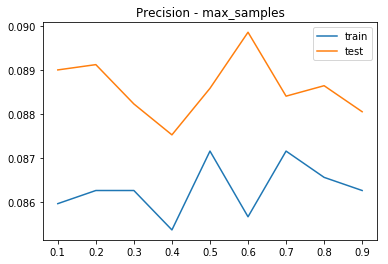

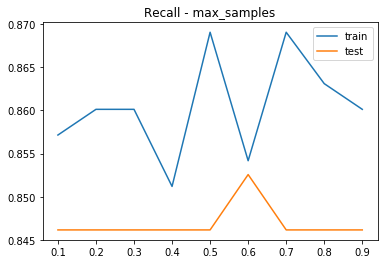

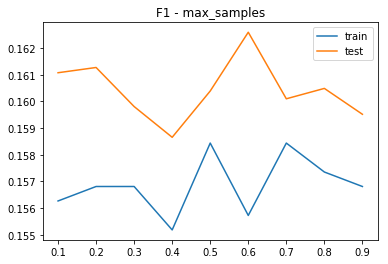

In [7]:
train_prec = []
test_prec = []
train_rec = []
test_rec = []
train_f1 = []
test_f1 = []
for ms in np.arange(0.1, 1, 0.1):
    isof = IsolationForest(n_estimators=200, contamination=0.0168, behaviour='new', max_samples=ms, n_jobs=3, random_state=0)
    isof.fit(X_train)
    
    y_train_pred = isof.predict(X_train)
    y_test_pred = isof.predict(X_test)
    y_train_pred = np.array([pred==-1 for pred in y_train_pred], dtype=int)
    y_test_pred = np.array([pred==-1 for pred in y_test_pred], dtype=int)
    
    train_prec.append(precision_score(y_train, y_train_pred))
    test_prec.append(precision_score(y_test, y_test_pred))
    train_rec.append(recall_score(y_train, y_train_pred))
    test_rec.append(recall_score(y_test, y_test_pred))
    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))
    
plt.plot(np.arange(0.1, 1, 0.1), train_prec, label='train')
plt.plot(np.arange(0.1, 1, 0.1), test_prec, label='test')
plt.title("Precision - max_samples")
plt.legend()
plt.show()
    
plt.plot(np.arange(0.1, 1, 0.1), train_rec, label='train')
plt.plot(np.arange(0.1, 1, 0.1), test_rec, label='test')
plt.title("Recall - max_samples")
plt.legend()
plt.show()    

plt.plot(np.arange(0.1, 1, 0.1), train_f1, label='train')
plt.plot(np.arange(0.1, 1, 0.1), test_f1, label='test')
plt.title("F1 - max_samples")
plt.legend()
plt.show()

---Train---
Precision: 0.0853
Recall: 0.8601
F1: 0.1551
Confusion matrix:
[[195927   3101]
 [    47    289]]

---Test---
Precision: 0.0869
Recall: 0.8462
F1: 0.1576
Confusion matrix:
[[83900  1387]
 [   24   132]]


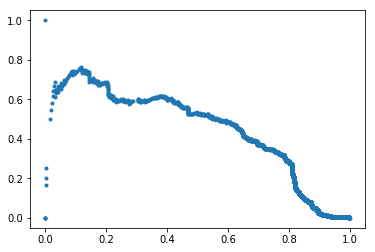

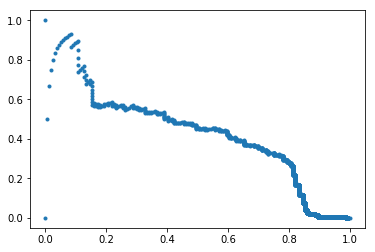

(0.47172903958185813, 0.4385545686081844)

In [8]:
isof = IsolationForest(n_estimators=200, contamination=0.017, behaviour='new', max_samples=0.9, n_jobs=3, random_state=0)
isof.fit(X_train)

y_train_pred = isof.predict(X_train)
y_test_pred = isof.predict(X_test)
y_train_pred = np.array([pred==-1 for pred in y_train_pred], dtype=int)
y_test_pred = np.array([pred==-1 for pred in y_test_pred], dtype=int)
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

y_train_score = -isof.score_samples(X_train)
y_test_score = -isof.score_samples(X_test)
aucpr(y_train, y_train_score), aucpr(y_test, y_test_score)

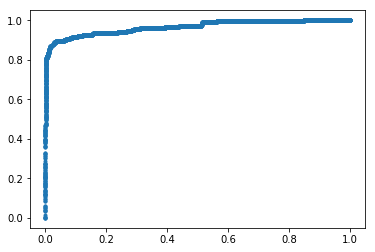

In [9]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_score)
plt.plot(fpr, tpr, '.')
plt.show()

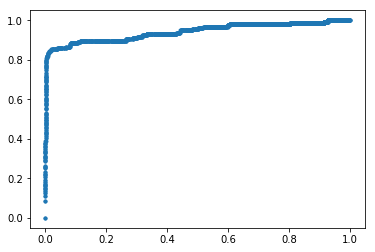

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
plt.plot(fpr, tpr, '.')
plt.show()